<a href="https://colab.research.google.com/github/aritanaoya/howling_canceler/blob/master/Sin_noisy_canceller_with_DNCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install librosa==0.7

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import librosa
import wave
import struct
import librosa.core as lc  
import scipy 
import IPython.display as ipd
import os
import librosa.display



A=0.1#振幅
fs = 8000#サンプリング周波数
f0 = 440#基本周波数(今回はラ)
sec = 2 #秒

#sin波
#--------------------------------------------------------------------------------------------------------------------
def create_wave(A,f0,fs,t):#A:振幅,f0:基本周波数,fs:サンプリング周波数,再生時間[s]
    #nポイント
    #--------------------------------------------------------------------------------------------------------------------
    point = np.arange(0,fs*t)
    sin_wave =A* np.sin(2*np.pi*f0*point/fs)

    sin_wave = [int(x * 32767.0) for x in sin_wave]#16bit符号付き整数に変換

    #バイナリ化
    binwave = struct.pack("h" * len(sin_wave), *sin_wave)

    #サイン波をwavファイルとして書き出し
    w = wave.Wave_write("440Hz.wav")
    p = (1, 2, fs, len(binwave), 'NONE', 'not compressed')#(チャンネル数(1:モノラル,2:ステレオ)、サンプルサイズ(バイト)、サンプリング周波数、フレーム数、圧縮形式(今のところNONEのみ)、圧縮形式を人に判読可能な形にしたもの？通常、 'NONE' に対して 'not compressed' が返されます。)
    w.setparams(p)
    w.writeframes(binwave)
    w.close()
create_wave(A, f0, fs, sec) 

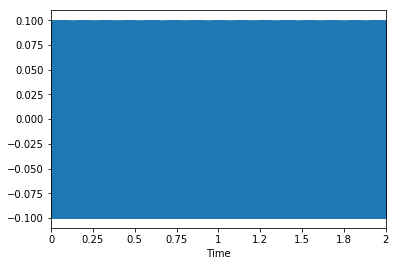

In [0]:
import IPython.display as ipd
def load_sound_files(parent_dir, file_paths):
    raw_sounds = []
    
    for fp in file_paths:
        y,sr = librosa.load(parent_dir + fp, sr=8000,dtype='float32',duration=10)
        #デフォルトでモノラル化、
        raw_sounds.append(y)
    return raw_sounds
sin_file_paths=["440Hz.wav"]
parent_dir3 = '/content/'
sin=[]
sin= load_sound_files(parent_dir3,sin_file_paths)
librosa.display.waveplot(sin[0], 8000)
ipd.Audio(data=sin,rate=8000)

In [0]:
import os, shutil

os.getcwd()
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id = '1pfqDJw7gAFXM7EguQzvKX3vn0r3VRvrM'  # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('correct_sounds.zip')

In [0]:
id = '1_f9QqOEv7CfDgN4jXGoQ-1Agpoah_lvu'  # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('ford8k.wav.zip')

In [0]:
!unzip ford8k.wav.zip
!ls
import librosa
import librosa.core as lc  
import numpy as np  
import scipy 
import IPython.display as ipd
import os
import matplotlib.pyplot as plt

import librosa.display

Archive:  ford8k.wav.zip
  inflating: ford8k.wav              
   creating: __MACOSX/
  inflating: __MACOSX/._ford8k.wav   
440Hz.wav  correct_sounds.zip  ford8k.wav.zip  sample_data
adc.json   ford8k.wav	       __MACOSX


In [0]:
import wave
import struct
import math
import os
from scipy import fromstring, int16

# 一応既に同じ名前のディレクトリがないか確認。
file = os.path.exists("output2")
print(file)

if file == False:
    #保存先のディレクトリの作成
    os.mkdir("output2")

def cut_wav(filename,time):  # WAVファイルを刈り奪る　形をしてるだろ？ 
    # timeの単位は[sec]

    # ファイルを読み出し
    wavf = filename + '.wav'
    wr = wave.open(wavf, 'r')

    # waveファイルが持つ性質を取得
    ch = wr.getnchannels()
    width = wr.getsampwidth()
    fr = wr.getframerate()
    fn = wr.getnframes()
    total_time = 1.0 * fn / fr
    integer = math.floor(total_time) # 小数点以下切り捨て
    t = int(time)  # 秒数[sec]
    frames = int(ch * fr * t)
    num_cut = int(integer//t)

    #　確認用
    print("Channel: ", ch)
    print("Sample width: ", width)
    print("Frame Rate: ", fr)
    print("Frame num: ", fn)
    print("Params: ", wr.getparams())
    print("Total time: ", total_time)
    print("Total time(integer)",integer)
    print("Time: ", t) 
    print("Frames: ", frames) 
    print("Number of cut: ",num_cut)

    # waveの実データを取得し、数値化
    data = wr.readframes(wr.getnframes())
    wr.close()
    X = fromstring(data, dtype=int16)
    print(X)


    for i in range(num_cut):
        print(i)
        # 出力データを生成
        outf = 'output2/' + str(i) +'.wav'
        start_cut = i*frames
        end_cut = i*frames + frames
        print(start_cut)
        print(end_cut)
        Y = X[start_cut:end_cut]
        outd = struct.pack("h" * len(Y), *Y)

        # 書き出し
        ww = wave.open(outf, 'w')
        ww.setnchannels(ch)
        ww.setsampwidth(width)
        ww.setframerate(fr)
        ww.writeframes(outd)
        ww.close()

print("input filename = ")
f_name = input()
print("cut time = ")
cut_time = input()
cut_wav(f_name,cut_time)

In [0]:
!pwd
!ls /content/output2


/content
0.wav	12.wav	15.wav	18.wav	20.wav	23.wav	3.wav  6.wav  9.wav
10.wav	13.wav	16.wav	19.wav	21.wav	24.wav	4.wav  7.wav
11.wav	14.wav	17.wav	1.wav	22.wav	2.wav	5.wav  8.wav


In [276]:
correct_sound_file_paths = ["0.wav","1.wav","2.wav","3.wav","4.wav","5.wav","6.wav","7.wav","8.wav","9.wav","10.wav","11.wav","12.wav","13.wav","14.wav",
                            "15.wav","16.wav","17.wav","18.wav","19.wav","20.wav","21.wav","22.wav","23.wav","24.wav"]
                            
                            
parent_dir = '/content/output2/'
correct_sounds=[]
correct_sounds =load_sound_files(parent_dir,correct_sound_file_paths)
print(correct_sounds[0].shape)
ipd.Audio(data=correct_sounds[0],rate=8000)

(16000,)


In [0]:
sin_sounds=[]
for i in range(len(correct_sound_file_paths)):
  sin_sounds.append(correct_sounds[i] + sin[0])



#print(sin_sounds)



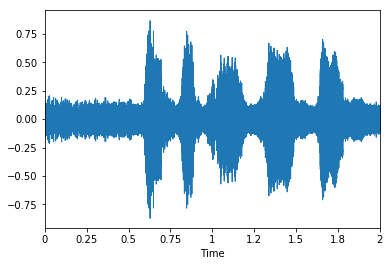

In [278]:
librosa.display.waveplot(sin_sounds[0], 8000)

ipd.Audio(data=sin_sounds[0],rate=8000)

In [328]:
# Get the power spectrogram
def cal_power_spectrogram(y):
  x=[]
  for i in  range(len(y)):
    x.append(np.abs(librosa.stft(y[i],n_fft = 1024)))
  return x

train_files=[]
train_noisy_files =[]
train_files = cal_power_spectrogram(correct_sounds)
print(train_files[0].shape)

train_noisy_files = cal_power_spectrogram(sin_sounds)
x = np.array(train_files)
train_files1 =np.log(x + 1e-6)
x1  = np.array(train_noisy_files)
train_noisy_files1 =np.log(x1+ 1e-6)

(513, 63)


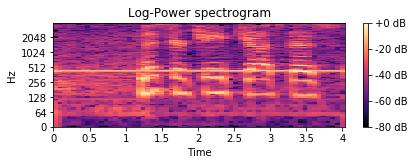

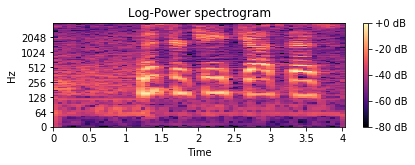

In [381]:
#音声プロット
#パワースペクトルと対数パワースペクトル

def plt_power_spec(S,sr):
  plt.figure()
  plt.subplot(2, 1, 2)
  #S1 = np.exp(S)
  librosa.display.specshow(librosa.power_to_db(S**2, ref=np.max),
                         sr=sr, y_axis='log', x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Log-Power spectrogram')
  plt.tight_layout()
  plt.show()
  
  

plt_power_spec(np.exp(train_noisy_files1[0]),8000)
plt_power_spec(np.exp(train_files1[0]),8000)


(15872,)


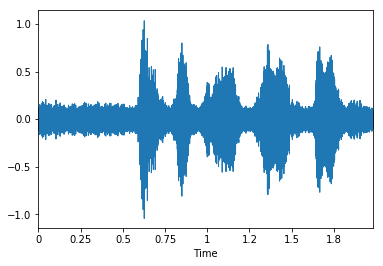

In [292]:
y0=np.exp(train_noisy_files1[0])
y1=lc.griffinlim(y0)
print(y1.shape)
librosa.display.waveplot(y1, 8000)
ipd.Audio(data=y1,rate=8000)


(513, 63)
(15872,)


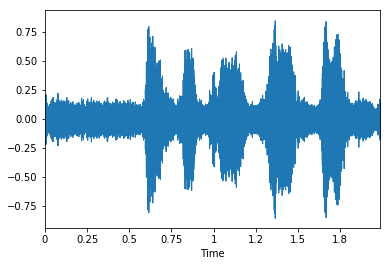

In [293]:
#griffin_limの確認（位相復元）
print(train_noisy_files[0].shape)
y=lc.griffinlim(train_noisy_files[0])
print(y.shape)
librosa.display.waveplot(y, 8000)
ipd.Audio(data=y,rate=8000)



In [329]:
freq = 513
time = 63

train_num =25
test_num = 5

#型の変更
x_train = np.zeros(freq*time*train_num*len(train_files)).reshape(train_num*len(train_files), freq, time)
x_train_noisy=np.zeros(freq*time*train_num*len(train_noisy_files)).reshape(train_num*len(train_noisy_files), freq, time)


print(x_train.shape)
print(x_train_noisy.shape)

(625, 513, 63)
(625, 513, 63)


In [339]:
#print(train_noisy_files[0])
def min_max(x, axis=None):
    xmin = x.min(axis=axis, keepdims=True)
    xmax = x.max(axis=axis, keepdims=True)
    result = (x- xmin)/(xmax-xmin)

    return result, xmin ,xmax


#正規化
x_train , trainmin , trainmax = min_max(train_files1)
x_train_noisy, trainmin_noisy, trainmax_noisy = min_max(train_noisy_files1)

print(x_train.shape)

(25, 513, 63)


In [340]:

# CNN用にデータを(batch_size, freq, time, 1)にreshape    
x_train_re=x_train.reshape(train_num, freq, time, 1)
x_train_noisy_re=x_train_noisy.reshape(train_num, freq, time, 1)
print(x_train_re.shape)
print(x_train_noisy_re.shape)

(25, 513, 63, 1)
(25, 513, 63, 1)


In [0]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,Reshape,MaxPooling2D,UpSampling2D
from keras.layers import Conv2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Add
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers

# DNCNN
input_img = Input(shape=(513, 63, 1))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = Activation('relu')(x)

for i in range(15):
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

x = Conv2D(1, (3, 3), padding='same')(x)
output_img = Activation('tanh')(x)

# compile
model = Model(input_img, output_img)
model.compile(optimizer='adam', loss='mean_squared_error')


In [353]:
x_train1 = x_train_re[0:20,:,:,:]
x_noisy1 = x_train_noisy_re[0:20,:,:,:]
x_val = x_train_re[20:,:,:,:]
x_noisy_val =x_train_noisy_re[20:,:,:,:]
print(x_val.shape)
print(x_noisy_val.shape)


(5, 513, 63, 1)
(5, 513, 63, 1)


In [0]:
model.summary()

In [0]:
batch_size = 5
epochs = 50
saveDir = "/content/howling_canceller"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)

In [0]:
# options
es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
chkpt = saveDir + 'sin_noise_canceller_win5rb_weights.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# train
history = model.fit(x_noisy1, x_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_noisy_val, x_val),
                    callbacks=[es_cb, cp_cb],
                    shuffle=True)

In [0]:
how_cancel=model.predict(x_noisy_val)
#how_cancel_reshape=how_cancel1.reshape(125,513,63*1)
#how_cancel_re=np.zeros(freq*time*test_num*len(how_cancel1)).reshape(test_num*len(how_cancel1), freq, time)
#for i in range(len(x_noisy_val)):
#  how_cancel_re[i*test_num:(i+1)*test_num] = how_cancel_reshape

In [356]:
score = model.evaluate(x_noisy_val,x_val)
print('Test loss:', score)

5/5 [==============================] - 0s 39ms/step
Test loss: 0.0024543714243918657


In [0]:
how_cancel1 = np.exp(how_cancel[0] * (trainmax_noisy - trainmin_noisy) + trainmin_noisy)

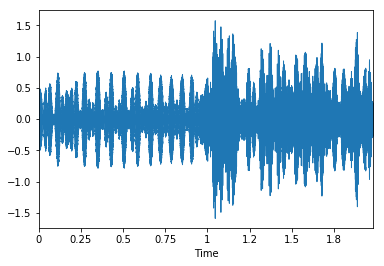

In [366]:
how_cancel_re= how_cancel1.reshape(513,63*1)
how_cancel_gri=lc.griffinlim(how_cancel_re)
librosa.display.waveplot(how_cancel_gri, sr=8000)
ipd.Audio(data=how_cancel_gri,rate=8000)

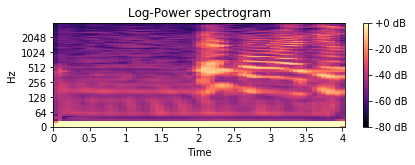

In [382]:
plt_power_spec(how_cancel_re,8000)

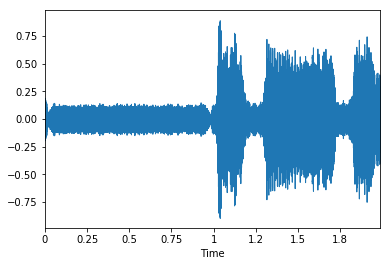

In [383]:
y0 = np.exp(x_noisy_val[0]*(trainmax_noisy - trainmin_noisy) + trainmin_noisy)
y = y0.reshape(513,63*1)
y_gri=lc.griffinlim(y)
librosa.display.waveplot(y_gri, sr=8000)
ipd.Audio(data=y_gri,rate=8000)


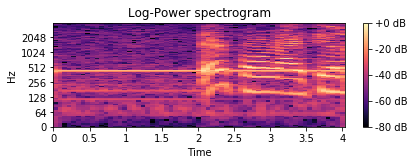

In [384]:
plt_power_spec(y,8000)

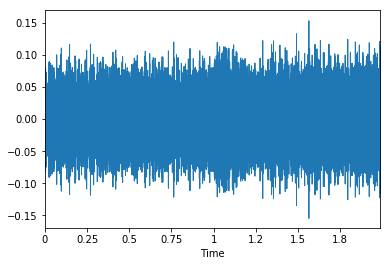

In [385]:
y1 = x_val[0].reshape(513,63*1)
y1_gri=lc.griffinlim(y1)
librosa.display.waveplot(y1_gri, sr=8000)
ipd.Audio(data=y1_gri,rate=8000)

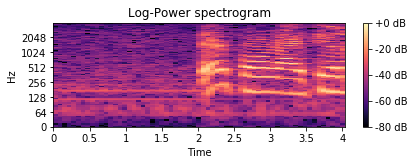

In [0]:
plt_power_spec(y1,8000)